In [2]:
# Julia Chancey
# Multimodal ML - hw 1 question 1
# Python Fundamentals

In [34]:
# imports ordered alphabetically
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [5]:
# loading info from csv files into dataframes and filling empty cells with 0
articles = pd.read_csv("articleInfo.csv").fillna(0)
authors = pd.read_csv("authorInfo.csv").fillna(0)

In [6]:
print(articles)

     Article No.                                              Title  Year  \
0              1  Study of Virtual Reality Immersive Technology ...  2022   
1              2  Factors Influencing Nursing Students' Immersiv...  2021   
2              3  A Novel Immersive Anatomy Education System (An...  2022   
3              4  Digital Learning Across Boundaries (DLAB): Imm...  2021   
4              5  Connecting Macroscopic, Molecular, and Symboli...  2022   
..           ...                                                ...   ...   
159          160  Virtual reality enhances safety training in th...  2022   
160          161  Virtual reality for developing intercultural c...  2022   
161          162  Virtual reality in problem-based learning cont...  2021   
162          163  Virtual reality is more efficient in learning ...  2020   
163          164  VR and MR technology for safety management edu...  2022   

     Author Number                                          Key Words  \
0 

In [7]:
print(authors)

              Author Name                       Author Affiliation Country  \
0             Yu-Sheng Su         National Taiwan Ocean University  Taiwan   
1          Hung-Wei Cheng         National Taiwan Ocean University  Taiwan   
2           Chin-Feng Lai           National Cheng Kung University  Taiwan   
3             Youngju Kim   Daejeon Health Institute of Technology   Korea   
4            Sung Yun Ahn                      Pai Chai University   Korea   
..                    ...                                      ...     ...   
383          Kenny Miller                  Boise State University      USA   
384  Shalini Ramachandran                       Chapman University     USA   
385             Sheree Fu  California State University Los Angeles     USA   
386          Karen Howell        University of Southern California     USA   
387        Steven Cutchin                  Boise State University      USA   

     Article No.  h-index  
0              1      0.0  
1      

In [97]:
# merging the two dataframes based on article no.
articles_authors_merge = pd.merge(articles, authors, on="Article No.")

In [98]:
print(articles_authors_merge)

     Article No.                                              Title  Year  \
0              1  Study of Virtual Reality Immersive Technology ...  2022   
1              1  Study of Virtual Reality Immersive Technology ...  2022   
2              1  Study of Virtual Reality Immersive Technology ...  2022   
3              2  Factors Influencing Nursing Students' Immersiv...  2021   
4              2  Factors Influencing Nursing Students' Immersiv...  2021   
..           ...                                                ...   ...   
383           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
384           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
385           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
386           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
387           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   

     Author Number                                          Key Words  \
0 

In [119]:
sort_year = articles_authors_merge.sort_values("Year")

In [120]:
# plotting yearly_publication
year_pub = sort_year.groupby("Year")["Title"].count()
print(year_pub)

Year
2017      8
2018     18
2019     19
2020     71
2021    106
2022    166
Name: Title, dtype: int64


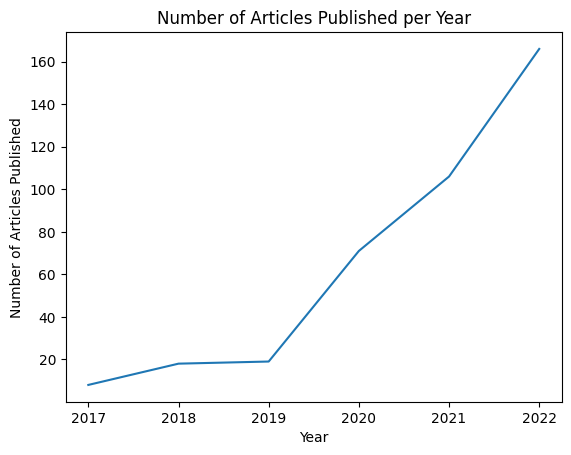

In [131]:
plt.plot(year_pub.index, year_pub.values)
plt.xlabel("Year")
plt.ylabel("Number of Articles Published")
plt.title("Number of Articles Published per Year")
plt.show()

In [123]:
# plotting yearly_citation
year_cite = articles_authors_merge.groupby("Year")["Citation"].sum()
print(year_cite)

Year
2017    3340.0
2018    1690.0
2019    1759.0
2020    1653.0
2021    1344.0
2022     417.0
Name: Citation, dtype: float64


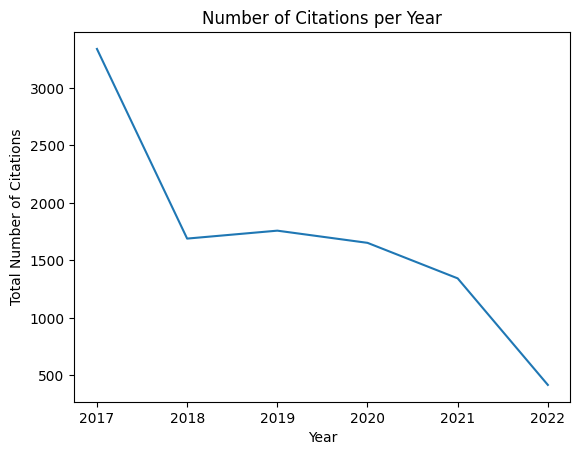

In [132]:
plt.plot(year_cite.index, year_cite.values)
plt.xlabel("Year")
plt.ylabel("Total Number of Citations")
plt.title("Number of Citations per Year")
plt.show()

In [125]:
# plotting number of publications across countries
pubs_country = articles_authors_merge.groupby("Country")["Article No."].count().reset_index()

In [138]:
# changing country name of USA to United States of America so that geopandas map can identify the country
pubs_country.loc[pubs_country['Country'] == 'USA', 'Country'] = 'United States of America'
print(pubs_country)

                     Country  Article No.
0                          0            2
1                  Australia           13
2                    Bristol            1
3                     Canada           12
4                      Chian            1
5                      Chile            3
6                     Chile             6
7                      China           34
8                     Cyprus            7
9             Czech Republic           15
10                   Denamrk            8
11                  Denmark             5
12                    France            7
13                   Germany           26
14                    Greece            5
15                 Hong Kong            8
16                     India            3
17                   Ireland           17
18                   Israel             1
19                     Italy           19
20                     Korea            3
21                Kyrgyzstan            1
22             Liechtenstein      

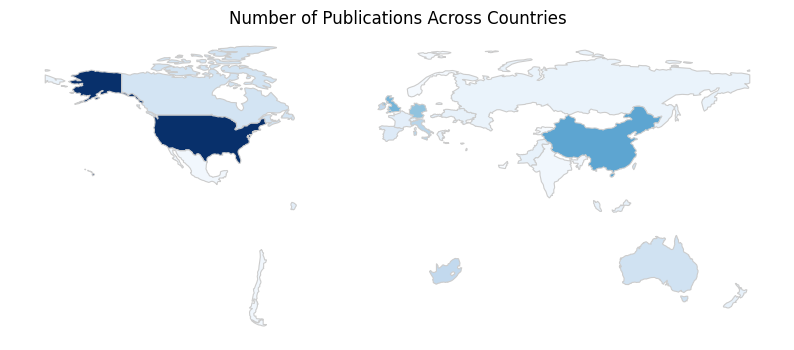

In [139]:
# loading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# merging the world map with the publication data
merged = world.merge(pubs_country, left_on='name', right_on='Country')

# plotting the figure
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
merged.plot(column='Article No.', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Number of Publications Across Countries')
plt.show()

In [127]:
# top 5 institutions with most published articles
pubs_inst = articles_authors_merge.groupby("Author Affiliation")["Article No."].count().reset_index()

In [128]:
pubs_inst = pubs_inst.sort_values("Article No.", ascending=False)

In [129]:
top5 = pubs_inst.head(5)
print(top5)

                 Author Affiliation  Article No.
139  University of the Western Cape           17
56               Masaryk University           12
41                Intel Corporation           11
102         University College Cork           11
54      Madigan Army Medical Center            8


In [130]:
# top 5 researchers with most published articles
top_researchers = articles_authors_merge.groupby("Author Name")["h-index"].max().reset_index().sort_values(by="h-index", ascending=False).head(5)

print(top_researchers)

             Author Name  h-index
339     Ulrich Trautwein     95.0
249     Nicolas Molinari     63.0
108     George S. Athwal     59.0
342  Vicente A. González     33.0
209  Maria Luisa Lorusso     33.0
